<a href="https://colab.research.google.com/github/waraporn19/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Dataviz_2021'

In [4]:
data= pd.read_csv(os.path.join(path,'search_request.csv'),encoding='latin1')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


เตรียมข้อมูล

In [ ]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce') #กำหนด  format ให้เป็น Datetime จากเดิม str
data

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88
...,...,...,...,...,...,...,...,...,...,...
10004352,10005225,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,okhttp/3.9.0;WongnaiAndroid 8.16.6;OPPO;CPH1729,NaN,153319.0,1oaki72de48dm87jbgj2a2crgf,22,NaN,NaN
10004353,10005226,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,1pb7i5fe2g9hd92qbkbgh06aek,22,NaN,NaN
10004354,10005227,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,NaN,282oq0of578c6p4q760medgd30,22,NaN,NaN
10004355,10005228,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH;)",NaN,21520.0,2cpkib5gr19un9fmner728bair,22,NaN,NaN


Grouped bar chart

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

73249

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

31874

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [6]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s

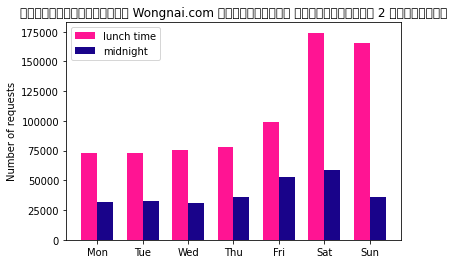

In [ ]:
x = np.arange(len(labels))  # ตำแหน่ง แกน   X  =  labels
width = 0.35  # the width of the bars #ความกว้างของ bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#FF7F50')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

#Stacked bar chart

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s

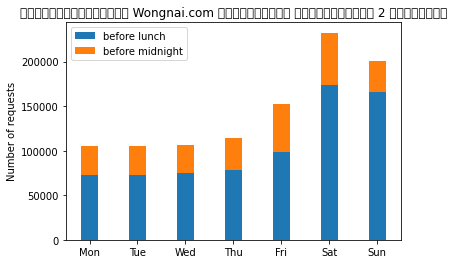

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight')
#bottom คือเรากำหนดได้ว่ากราฟอีค่าข้อมูล จะเริ่มจากตรงไหนของข้อมูลเก่า

ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s

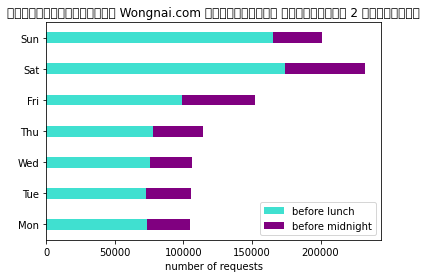

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#40E0D0')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#800080')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

#[เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3603 missing from current font.
  font.set_text(s

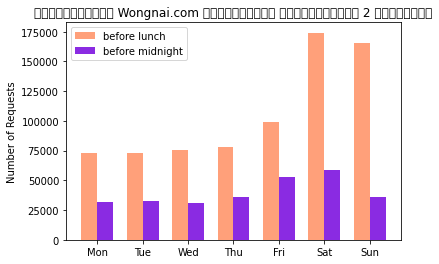

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='before lunch', color='#FFA07A')
rects2 = ax.bar(x + width/2,b4midnight, width, label='before midnight', color = '#8A2BE2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

#Histogram กราฟความถี่่

In [7]:
# Fixing random state for reproducibility
np.random.seed(2021)

In [8]:
np.random.randint(100)

85

In [9]:
np.random.randn(100) #mu=0 std=1

array([-0.65278343,  0.42193173, -0.17383896, -0.20136597,  0.77039766,
        1.20160669, -0.19009954,  0.13407709, -0.75051215,  0.21162099,
        2.0448903 ,  1.07526774,  0.07902026,  0.49328237, -0.79136747,
       -2.13059519,  0.31720629, -1.36461749,  0.35842752, -1.30562426,
        2.02071843, -2.68680391,  0.55787157,  0.77617621,  0.20264991,
       -0.50735635,  1.05898217,  0.46323535,  0.49699852, -1.25014539,
       -1.51195802,  0.89457475,  0.24281041,  1.00678612, -0.04124402,
        0.34396583,  0.02548591, -1.07844433,  0.81565795, -0.13376737,
        0.61319221,  0.32808139,  1.7748439 ,  1.15295013,  1.02961911,
       -0.50175762, -1.09042286, -1.10397942, -0.64776684, -0.82386881,
       -0.97420544,  0.42570077,  1.59288883, -1.2010321 , -1.76059321,
       -0.8979381 , -0.21097685,  1.78542198,  0.31632373,  0.42776574,
        1.32762063,  0.42865209, -0.80177471, -1.40404436,  0.4366976 ,
        0.86278299, -0.48927924,  1.50419932, -1.05216008, -1.47

In [10]:
mu, sigma =100,15
X = mu + sigma * np.random.randn(10000)

In [11]:
X

array([106.27297175, 105.18679309,  87.6298573 , ..., 104.93498539,
        90.71739267,  98.11272785])

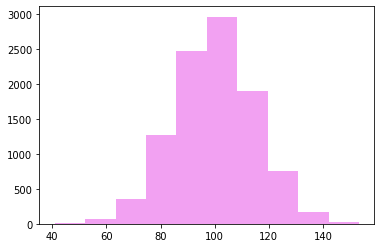

In [12]:
output = plt.hist(X,10,facecolor = 'violet',alpha=0.75);

In [13]:
output

(array([  13.,   70.,  351., 1270., 2478., 2967., 1897.,  753.,  172.,
          29.]), array([ 40.88463603,  52.13062451,  63.376613  ,  74.62260148,
         85.86858997,  97.11457845, 108.36056694, 119.60655543,
        130.85254391, 142.0985324 , 153.34452088]), <a list of 10 Patch objects>)

#Plot Histogram ของ number of result

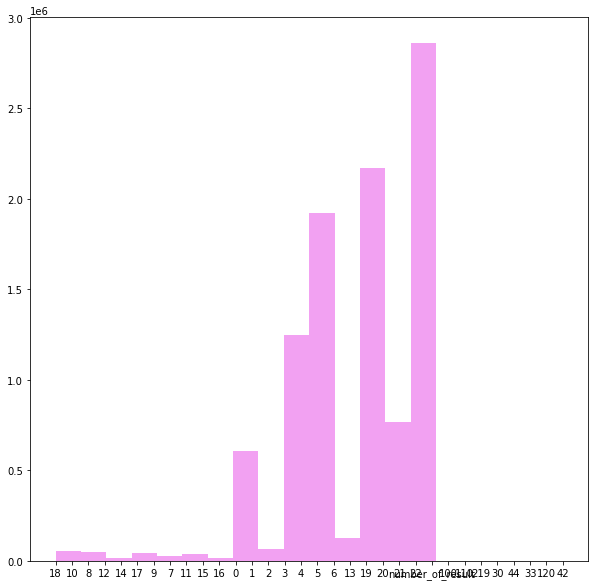

In [15]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[10,10]
output1 = plt.hist(list(data['number_of_result']),20,facecolor = 'violet',alpha=0.75);

In [16]:
data.dtypes

Unnamed: 0            int64
search_id            object
search_timestamp     object
user_agent           object
q                    object
user_id             float64
session_id           object
number_of_result     object
lat                  object
long                 object
dtype: object

#เรียกดู data type ของตัวแปร

In [17]:
type(data['number_of_result'][0])

int

ตรวจสอบ data type ของตัวแปร

In [18]:
type(data['number_of_result'][0]) == int

True

ตรวจสอบดูทุกๆค่าใน column 'number of result'

In [19]:
#for x in data['number_of_result'] :
#   if type(x) != int:
#       print(f'ข้อมูล{x} -> {type(x)}')

ลบ record ที่มีค่าใน column 'number of result' เป็น number of result

In [20]:
data[data['number_of_result'] == 'number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
1000016,1000032,search_id,search_timestamp,user_agent,original_q,228667.0,session_id,number_of_result,lat,long


In [21]:
data.drop(1000016,inplace=True)

In [23]:
data[data['number_of_result'] == 'number_of_result']

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long


In [24]:
new_type = data['number_of_result'].astype('int32')

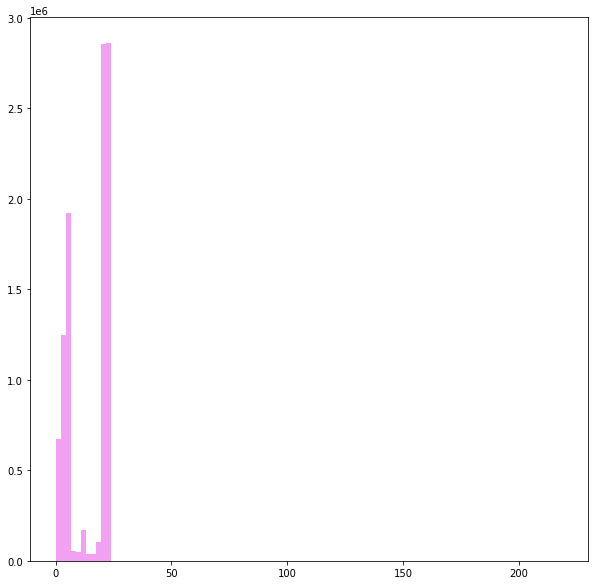

In [25]:
output2 = plt.hist(new_type,100,facecolor = 'violet',alpha=0.75)

ลบ Outlier

In [26]:
new_type_nooutlier = new_type[new_type < 25]

In [27]:
new_type.shape[0] - new_type_nooutlier.shape[0]

14

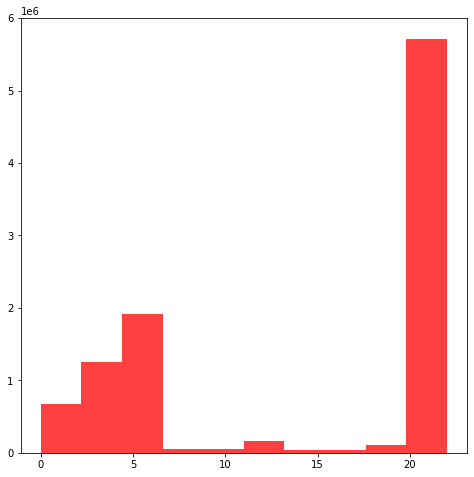

In [28]:
matplotlib.rcParams['figure.figsize']=[8,8]
output2 = plt.hist(new_type_nooutlier,10,facecolor = 'red',alpha=0.75);

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [29]:
q7 = new_type[new_type < 20]

In [34]:
q7.count()

4287104

In [41]:
q7_1 = new_type[new_type == 20]

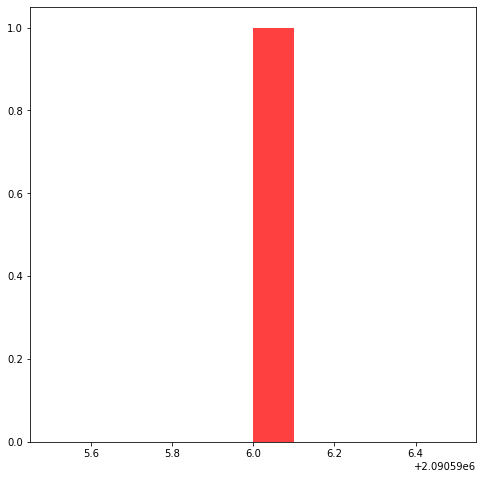

In [39]:
plt.hist(q7_1.count(),10,facecolor = 'red',alpha=0.75);